# Resilient Distributed Datasets (RDDs) playground

The goal here is to get comfortable in creating a Spark context in Python and perform basic transformations and actions on RDDs. 

Some of the basic operations demonstrated here are mapping, filtering, reducing, sampling and set operations. 

The notebook also shows working with pairs, whole text files, extracting file names and getting content sizes.

## Install Spark

In [1]:
!pip install findspark

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install pyspark==3.4.1

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from pyspark import SparkContext, SparkConf

In [4]:
conf = SparkConf().setAppName("test").setMaster("local[*]")
sc=SparkContext(conf=conf)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/11/03 20:32:01 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/11/03 20:32:03 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


## Basic operations

In [5]:
data=[1,2,3,4,5,6,7,8,9,10]

In [6]:
rdd1=sc.parallelize(data)

In [7]:
rdd2=rdd1.map(lambda x:x+1)

In [8]:
rdd2.take(10)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [9]:
rdd2.foreach(print)

2
3
4
5
6
7
8
9
10
11


In [10]:
coll=rdd2.collect()

In [11]:
for val in coll:
    print(val)

2
3
4
5
6
7
8
9
10
11


In [12]:
rdd3=rdd1.filter(lambda x: x%2 ==0)

In [13]:
rdd3.take(5)

[2, 4, 6, 8, 10]

In [14]:
rdd3.foreach(print)

2
4
6
8
10


In [15]:
rdd4= sc.parallelize([1,2,2,3,3,3,4])

In [16]:
rdd5=rdd4.distinct()

In [18]:
rdd5.foreach(print)

1
3
2
4


In [19]:
rdd5.take(4)

[2, 4, 1, 3]

## Nested Lists

In [20]:
x=[[1,2,3],[2,3],[3],[3]]

In [21]:
print(x)

[[1, 2, 3], [2, 3], [3], [3]]


In [22]:
rdd6=sc.parallelize(x)

In [23]:
rdd7=rdd6.flatMap(lambda xs : [x for x in xs])

In [24]:
rdd7.collect()

[1, 2, 3, 2, 3, 3, 3]

## Wordcount in Spark

In [58]:
lines=sc.textFile("/home/ashitachandnani/CS535-resources/examples/wordcount/input/Complete-Shakespeare.txt")

In [59]:
rdd8= lines.flatMap(lambda s : s.split(" "))

In [60]:
rdd8.take(4)

['This', 'is', 'the', '100th']

In [61]:
rdd9=rdd8.map(lambda s : (s,1))

In [62]:
rdd9.take(5)

[('This', 1), ('is', 1), ('the', 1), ('100th', 1), ('Etext', 1)]

In [63]:
counts=rdd9.reduceByKey(lambda a,b :a+b)

In [64]:
counts.take(5)

[('Etext', 4), ('file', 14), ('by', 2824), ('Gutenberg,', 1), ('and', 18297)]

In [65]:
s=counts.sample(False, 0.01)

In [66]:
s.count()

634

In [67]:
s.take(5)

[('contain', 13),
 ('modification,', 1),
 ('well', 850),
 ('rondure', 1),
 ('ghastly', 4)]

### Using wildcards -  *

In [68]:
lines1=sc.textFile("/home/ashitachandnani/CS535-resources/examples/wordcount/input/*.txt")

In [69]:
rdd10= lines1.flatMap(lambda s : s.split(" "))

In [70]:
rdd10.take(4)

['***This', 'is', 'the', 'Project']

In [71]:
rdd11=rdd10.map(lambda s : (s,1))

In [72]:
rdd11.take(5)

[('***This', 1), ('is', 1), ('the', 1), ('Project', 1), ('Gutenberg', 1)]

In [73]:
counts1=rdd11.reduceByKey(lambda a,b :a+b)

In [74]:
counts1.take(5)

[('', 839993),
 ('[10,000x100,000,000', 2),
 ('thousand', 579),
 ('more', 5030),
 ('and', 82396)]

In [75]:
s1=counts1.sample(False, 0.01)

In [76]:
s1.count()

2311

In [77]:
s1.take(5)

[('accept', 101),
 ('What', 2337),
 ("simpleton.'", 1),
 ('Soup!', 4),
 ('cold?', 4)]

## Sampling

In [78]:
rdd12=sc.parallelize([1,2,3,2,3,4,5,6,6])

In [79]:
s2=rdd12.sample(False,0.5)

In [80]:
s2.collect()

[1, 2, 3, 4, 5, 6, 6]

In [81]:
s2=rdd12.sample(False,0.5, 12345)

In [83]:
s2.collect()

[2, 4, 5, 6, 6]

## Set operations

In [84]:
set1 = sc.parallelize([1,2,3])

In [85]:
set2 = sc.parallelize([3,4,5])

In [86]:
set3 = set1.union(set2)

In [87]:
set3.collect()

[1, 2, 3, 3, 4, 5]

In [88]:
set3=set1.intersection(set2)

In [89]:
set3.collect()

[3]

In [90]:
set3 = set1.subtract(set2)

In [91]:
set3.collect()

[1, 2]

In [92]:
set3 = set1.cartesian(set2)

In [93]:
set3.collect()

[(1, 3), (1, 4), (1, 5), (2, 3), (3, 3), (2, 4), (2, 5), (3, 4), (3, 5)]

## Playing with Pairs

In [94]:
set4 = set3.groupByKey()

In [95]:
set4.foreach(print)

(2, <pyspark.resultiterable.ResultIterable object at 0x7f15c948f050>)2 + 2) / 4]
(1, <pyspark.resultiterable.ResultIterable object at 0x7f15c948f050>)
(3, <pyspark.resultiterable.ResultIterable object at 0x7f15c9483c10>)


In [96]:
set5=set3.mapValues(lambda x : x*10)

In [97]:
set5.take(3)

[(1, 30), (1, 40), (1, 50)]

In [98]:
set6=set3.sortByKey(False)

In [99]:
set6.collect()

[(3, 3), (3, 4), (3, 5), (2, 3), (2, 4), (2, 5), (1, 3), (1, 4), (1, 5)]

In [100]:
set7=set3.keys()
set7.collect()

[1, 1, 1, 2, 3, 2, 2, 3, 3]

In [101]:
set7.distinct().collect()

[1, 2, 3]

In [102]:
set8=set3.values()

In [103]:
set8.collect()

[3, 4, 5, 3, 3, 4, 5, 4, 5]

## Whole Text Files

In [104]:
folder =sc.wholeTextFiles("/home/ashitachandnani/CS535-resources/examples/wordcount/input")

In [105]:
files = folder.keys()

In [106]:
files.collect()

['file:/home/ashitachandnani/CS535-resources/examples/wordcount/input/Alice-in-Wonderland.txt',
 'file:/home/ashitachandnani/CS535-resources/examples/wordcount/input/Bill-of-Rights.txt',
 'file:/home/ashitachandnani/CS535-resources/examples/wordcount/input/Complete-Shakespeare.txt',
 'file:/home/ashitachandnani/CS535-resources/examples/wordcount/input/Decl-of-Ind-USA.txt',
 'file:/home/ashitachandnani/CS535-resources/examples/wordcount/input/Encyclopaedia.txt',
 'file:/home/ashitachandnani/CS535-resources/examples/wordcount/input/Flatland.txt',
 'file:/home/ashitachandnani/CS535-resources/examples/wordcount/input/Gettysburg-Address.txt',
 'file:/home/ashitachandnani/CS535-resources/examples/wordcount/input/Gift-of-the-Magi.txt',
 'file:/home/ashitachandnani/CS535-resources/examples/wordcount/input/Les-Miserables.txt',
 'file:/home/ashitachandnani/CS535-resources/examples/wordcount/input/Patrick-Henry.txt',
 'file:/home/ashitachandnani/CS535-resources/examples/wordcount/input/Scarlet-Le

In [107]:
import os
names= files.map(lambda s:os.path.basename(s))

In [108]:
names.collect()

['Alice-in-Wonderland.txt',
 'Bill-of-Rights.txt',
 'Complete-Shakespeare.txt',
 'Decl-of-Ind-USA.txt',
 'Encyclopaedia.txt',
 'Flatland.txt',
 'Gettysburg-Address.txt',
 'Gift-of-the-Magi.txt',
 'Les-Miserables.txt',
 'Patrick-Henry.txt',
 'Scarlet-Letter.txt',
 'Through-the-Looking-Glass.txt',
 'Tom-Sawyer-Abroad.txt',
 'US-Constitution.txt']

In [109]:
content = folder.values()

In [110]:
content.count()

14

In [111]:
sizes=content.map(lambda s : len(s))

In [112]:
sizes.collect()

[158315,
 10641,
 5458248,
 15890,
 8441343,
 203276,
 1688,
 21421,
 3263187,
 14678,
 517303,
 178845,
 183972,
 25730]

## flatMapValues, subtractByKey and join demo (taken from lecture slides)

In [113]:
set9=set3.mapValues(lambda x : x*2)

In [114]:
set9.take(3)

[(1, 6), (1, 8), (1, 10)]

In [117]:
set10=set9.flatMapValues(lambda x : range(x,10))

In [118]:
set10.collect()

[(1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 8),
 (1, 9),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (2, 8),
 (2, 9),
 (3, 8),
 (3, 9)]

In [119]:
# Create two pair RDDs
rdd13 = sc.parallelize([(1,2), (3,4), (3, 6)])
rdd14 = sc.parallelize([(3,9)])

# Subtract rdd14 from rdd13 using subtractByKey
result_rdd = rdd13.subtractByKey(rdd14)

result_rdd.collect()


[(1, 2)]

In [120]:
# Perform a join operation
join_rdd = rdd13.join(rdd14)

join_rdd.collect()


[(3, (4, 9)), (3, (6, 9))]

## Other basic actions

In [124]:
data=[1,2,3,4,5,6,7,8,9,10]

In [125]:
# reduce
rdd14=sc.parallelize(data)

rdd14.reduce(lambda a,b :a+b)

55

In [126]:
# first
rdd14.first()

1

In [127]:
# sample
rdd14.takeSample(False,3)

[1, 9, 4]

In [128]:
#takeOrdered
rdd14.takeOrdered(3)

[1, 2, 3]

In [129]:
#countByKey
data = [(1, 1), (2, 1), (2, 1), (3, 0)]
rdd15 = sc.parallelize(data)

rdd15.countByKey()


defaultdict(int, {1: 1, 2: 2, 3: 1})

In [130]:
# saveAsTTextFile
rdd15.saveAsTextFile('out.txt')


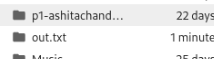

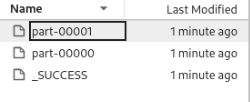